In [31]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import os
import re

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [20]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.linear_model import ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import BaggingRegressor

from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_squared_error
from sklearn.utils import shuffle
from scipy.special import erfc
from sklearn.dummy import DummyRegressor
from sklearn.svm import SVR

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

from sklearn.model_selection import train_test_split, cross_validate, RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, mean_squared_error, r2_score
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, RandomForestRegressor, VotingRegressor

from lightgbm import LGBMRegressor

import xgboost as xgb
from xgboost import XGBClassifier, XGBRegressor

import warnings

&nbsp;

&nbsp;


&nbsp;

# Data load

In [62]:
train = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')
submission=pd.read_csv('sample_submission.csv')

In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26457 entries, 0 to 26456
Data columns (total 20 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   index          26457 non-null  int64  
 1   gender         26457 non-null  object 
 2   car            26457 non-null  object 
 3   reality        26457 non-null  object 
 4   child_num      26457 non-null  int64  
 5   income_total   26457 non-null  float64
 6   income_type    26457 non-null  object 
 7   edu_type       26457 non-null  object 
 8   family_type    26457 non-null  object 
 9   house_type     26457 non-null  object 
 10  DAYS_BIRTH     26457 non-null  int64  
 11  DAYS_EMPLOYED  26457 non-null  int64  
 12  FLAG_MOBIL     26457 non-null  int64  
 13  work_phone     26457 non-null  int64  
 14  phone          26457 non-null  int64  
 15  email          26457 non-null  int64  
 16  occyp_type     18286 non-null  object 
 17  family_size    26457 non-null  float64
 18  begin_

&nbsp;

&nbsp;

&nbsp;

# EDA

&nbsp;

## 결측치 확인

In [11]:
train.isnull().sum()

index               0
gender              0
car                 0
reality             0
child_num           0
income_total        0
income_type         0
edu_type            0
family_type         0
house_type          0
DAYS_BIRTH          0
DAYS_EMPLOYED       0
FLAG_MOBIL          0
work_phone          0
phone               0
email               0
occyp_type       8171
family_size         0
begin_month         0
credit              0
dtype: int64

In [14]:
train[train.occyp_type.isnull()]

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,N,N,0,202500.0,Commercial associate,Higher education,Married,Municipal apartment,-13899,-4709,1,0,0,0,NaN,2.0,-6.0,1.0
8,8,M,Y,Y,1,180000.0,Commercial associate,Higher education,Married,House / apartment,-15131,-1466,1,0,0,1,NaN,3.0,-38.0,2.0
14,14,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22922,365243,1,0,1,0,NaN,1.0,-41.0,2.0
18,18,F,N,Y,0,216000.0,Pensioner,Secondary / secondary special,Married,House / apartment,-23113,365243,1,0,0,0,NaN,2.0,-37.0,2.0
19,19,F,N,Y,0,180000.0,Working,Secondary / secondary special,Married,House / apartment,-13727,-6031,1,0,0,0,NaN,2.0,-7.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26439,26439,F,N,Y,0,67500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19238,365243,1,0,0,0,NaN,2.0,-57.0,2.0
26441,26441,F,N,Y,0,90000.0,Pensioner,Incomplete higher,Separated,House / apartment,-24129,365243,1,0,0,0,NaN,1.0,-43.0,2.0
26443,26443,F,N,Y,0,90000.0,Pensioner,Secondary / secondary special,Single / not married,House / apartment,-22286,365243,1,0,0,0,NaN,1.0,-21.0,1.0
26449,26449,F,N,N,0,90000.0,Working,Secondary / secondary special,Married,House / apartment,-10498,-2418,1,1,1,0,NaN,2.0,-2.0,1.0


occyp_type: 직업 유형 변수만 결측값이 존재합니다. 이를 해결하기 위해서 다음 두가지 방법을 생각해봤습니다.

1. 결측값이 포함된 행 제거  
2. 멀티클래스를 각각 one-hot encoding을 통해 수치로 변환시킨 후 직업 클래스 값을 전부 0으로 대치

> 1번 방법은 언제든지 수행하기 쉬우니 전처리를 통해 2번 수행 방법을 추후에 전처리 과정 중에 수행하기로 했습니다.

&nbsp;

&nbsp;

## 각 변수 탐색

&nbsp;

> 본격적인 데이터 탐색에 앞서 binary class 변수와 multil class 변수를 one-hot encoding을 통해 수치형 변수로 변환하기로 했습니다.

&nbsp;

binary class 변수 변환

In [46]:
train_original = train.copy()               #원본 데이터 보존
test_original = test.copy()               

In [63]:
# 성별 F,M을 각각 0,1로 변환
train.gender = train.gender.replace(['F','M'],[0,1])  
test.gender = test.gender.replace(['F','M'],[0,1])

# 차량 보유 여부 N,Y을 각각 0,1로 변환
train.car = train.car.replace(['N','Y'],[0,1])  
test.car = test.car.replace(['N','Y'],[0,1])

# 부동산 보유 여부 N,Y을 각각 0,1로 변환
train.reality = train.reality.replace(['N','Y'],[0,1])  
test.reality = test.reality.replace(['N','Y'],[0,1])

In [48]:
train.iloc[:,1:4].head(3)

,gender,car,reality
0,0,0,0
1,0,0,1
2,1,1,1


&nbsp;

multi class 변수 변환 - 2가지 방법을 사용하기로 함

> label 변환

In [67]:
train_label = train.copy()
test_label = test.copy()

In [66]:
# multi class인 변수들 확인
train.income_type.value_counts()
train.edu_type.value_counts()
train.family_type.value_counts()
train.house_type.value_counts()
train.occyp_type.value_counts()

Working                 13645
Commercial associate     6202
Pensioner                4449
State servant            2154
Student                     7
Name: income_type, dtype: int64

Secondary / secondary special    17995
Higher education                  7162
Incomplete higher                 1020
Lower secondary                    257
Academic degree                     23
Name: edu_type, dtype: int64

Married                 18196
Single / not married     3496
Civil marriage           2123
Separated                1539
Widow                    1103
Name: family_type, dtype: int64

House / apartment      23653
With parents            1257
Municipal apartment      818
Rented apartment         429
Office apartment         190
Co-op apartment          110
Name: house_type, dtype: int64

Laborers                 4512
Core staff               2646
Sales staff              2539
Managers                 2167
Drivers                  1575
High skill tech staff    1040
Accountants               902
Medicine staff            864
Cooking staff             457
Security staff            424
Cleaning staff            403
Private service staff     243
Low-skill Laborers        127
Waiters/barmen staff      124
Secretaries                97
Realty agents              63
HR staff                   62
IT staff                   41
Name: occyp_type, dtype: int64

In [68]:
label_encoder=preprocessing.LabelEncoder()

# 소득 형태 변환
train_label['income_type']=label_encoder.fit_transform(train['income_type'])
test_label['income_type']=label_encoder.transform(test['income_type'])

# 학력 수준 변환
train_label['edu_type']=label_encoder.fit_transform(train['edu_type'])
test_label['edu_type']=label_encoder.transform(test['edu_type'])

# 가족 형태 변환
train_label['family_type']=label_encoder.fit_transform(train['family_type'])
test_label['family_type']=label_encoder.transform(test['family_type'])

# 가족 형태 변환
train_label['house_type']=label_encoder.fit_transform(train['house_type'])
test_label['house_type']=label_encoder.transform(test['house_type'])

# 직업 형태 변환
train_label['occyp_type']=label_encoder.fit_transform(train['occyp_type'])
test_label['occyp_type']=label_encoder.fit_transform(test['occyp_type'])

변환된 데이터셋

In [69]:
train_label.income_type.value_counts()
train_label.edu_type.value_counts()
train_label.family_type.value_counts()
train_label.house_type.value_counts()
train_label.occyp_type.value_counts()

4    13645
0     6202
1     4449
2     2154
3        7
Name: income_type, dtype: int64

4    17995
1     7162
2     1020
3      257
0       23
Name: edu_type, dtype: int64

1    18196
3     3496
0     2123
2     1539
4     1103
Name: family_type, dtype: int64

1    23653
5     1257
2      818
4      429
3      190
0      110
Name: house_type, dtype: int64

18    8171
8     4512
3     2646
14    2539
10    2167
4     1575
6     1040
0      902
11     864
2      457
16     424
1      403
12     243
9      127
17     124
15      97
13      63
5       62
7       41
Name: occyp_type, dtype: int64

직업형태(occyp_type)의 경우 결측치도 labeling된 문제를 확인할 수 있습니다. 이때 결측치도 하나의 정보로 판단해 데이터를 살릴 것인지 drop할지 결정해야 할 듯합니다.  
그리고 label encoding은 숫자의 크고 작음이 분석에 작용하는 단점도 있어용. 대신 데이터 저장 측면에서 효율적입니다.

&nbsp;

> one-hot encoding 변환

In [90]:
train_oh = train.copy()
test_oh = test.copy()

In [91]:
income_train = pd.get_dummies(train_oh.income_type)                 # 더미변수 생성해 one-hot encoding 수행
income_test = pd.get_dummies(test_oh.income_type)

edu_train = pd.get_dummies(train_oh.edu_type)
edu_test = pd.get_dummies(test_oh.edu_type)

family_train = pd.get_dummies(train_oh.family_type)
family_test = pd.get_dummies(test_oh.family_type)

house_train = pd.get_dummies(train_oh.house_type)
house_test = pd.get_dummies(test_oh.house_type)

occyp_train = pd.get_dummies(train_oh.occyp_type)
occyp_test = pd.get_dummies(test_oh.occyp_type)

In [92]:
occyp_train

,Accountants,Cleaning staff,Cooking staff,Core staff,Drivers,HR staff,High skill tech staff,IT staff,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26453,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26454,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
26455,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0


이번에는 결측값은 자동으로 모든 열에 대해 0으로 대치되었습니다.

In [93]:
train_oh = pd.concat([train_oh,income_train,edu_train,family_train,house_train, occyp_train],axis=1)
test_oh = pd.concat([test_oh,income_test,edu_test,family_test,house_test, occyp_test],axis=1)

In [98]:
train_oh = train_oh.drop(['income_type','edu_type','family_type','house_type','occyp_type'],axis=1)
test_oh = test_oh.drop(['income_type','edu_type','family_type','house_type','occyp_type'],axis=1)

생성 데이터셋

In [101]:
train_oh.head()

,index,gender,car,reality,child_num,income_total,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,...,Laborers,Low-skill Laborers,Managers,Medicine staff,Private service staff,Realty agents,Sales staff,Secretaries,Security staff,Waiters/barmen staff
0,0,0,0,0,0,202500.0,-13899,-4709,1,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,1,1,247500.0,-11380,-1540,1,0,...,1,0,0,0,0,0,0,0,0,0
2,2,1,1,1,0,450000.0,-19087,-4434,1,0,...,0,0,1,0,0,0,0,0,0,0
3,3,0,0,1,0,202500.0,-15088,-2092,1,0,...,0,0,0,0,0,0,1,0,0,0
4,4,0,1,1,0,157500.0,-15037,-2105,1,0,...,0,0,1,0,0,0,0,0,0,0


In [112]:
train_label

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,0,0,0,0,202500.0,0,1,1,2,-13899,-4709,1,0,0,0,18,2.0,-6.0,1.0
1,1,0,0,1,1,247500.0,0,4,0,1,-11380,-1540,1,0,0,1,8,3.0,-5.0,1.0
2,2,1,1,1,0,450000.0,4,1,1,1,-19087,-4434,1,0,1,0,10,2.0,-22.0,2.0
3,3,0,0,1,0,202500.0,0,4,1,1,-15088,-2092,1,0,1,0,14,2.0,-37.0,0.0
4,4,0,1,1,0,157500.0,2,1,1,1,-15037,-2105,1,0,0,0,10,2.0,-26.0,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26452,26452,0,0,0,2,225000.0,2,4,1,1,-12079,-1984,1,0,0,0,3,4.0,-2.0,1.0
26453,26453,0,0,1,1,180000.0,4,1,2,1,-15291,-2475,1,0,0,0,18,2.0,-47.0,2.0
26454,26454,0,1,0,0,292500.0,4,4,0,5,-10082,-2015,1,0,0,0,3,2.0,-25.0,2.0
26455,26455,1,0,1,0,171000.0,4,2,3,1,-10145,-107,1,0,0,0,8,1.0,-59.0,2.0


> 최종적으로 label encoding 버전인 train_label,test_label 데이터 셋과 one-hot encoding 버전인 train_oh, test_oh 데이터셋을 만들어 보았습니다.

## 이제 진짜 EDA

&nbsp;

### 상관분석

먼저 상관관계 알아보려고 통째로 집어 넣어서 확인해봤습니다.

In [103]:
train_label.corr()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
index,1.000000,-0.006261,0.004210,0.006645,0.001012,0.009848,0.009505,-0.003183,0.009149,-0.002161,-0.008901,0.004259,NaN,-0.005575,-0.001790,0.005332,-0.000384,-0.002867,0.002181,-0.007841
gender,-0.006261,1.000000,0.362320,-0.048927,0.076731,0.198455,0.103083,0.006351,-0.101969,0.067437,0.201138,-0.172990,NaN,0.064316,-0.027078,0.000108,-0.130283,0.111060,0.007707,0.001562
car,0.004210,0.362320,1.000000,-0.016599,0.101846,0.213432,0.048361,-0.105567,-0.124280,0.018617,0.156883,-0.159260,NaN,0.026124,-0.013730,0.018904,-0.121225,0.149463,-0.029955,0.007761
reality,0.006645,-0.048927,-0.016599,1.000000,0.000435,0.035377,-0.048468,0.011535,0.028144,-0.177957,-0.130241,0.097947,NaN,-0.208648,-0.065553,0.051085,0.047347,-0.006667,0.003863,-0.009387
child_num,0.001012,0.076731,0.101846,0.000435,1.000000,0.032186,0.106498,-0.049002,-0.161222,0.023120,0.332816,-0.228159,NaN,0.051521,-0.010555,0.016120,-0.135173,0.890530,-0.007229,0.004081
income_total,0.009848,0.198455,0.213432,0.035377,0.032186,1.000000,-0.075175,-0.225893,-0.005802,-0.004514,0.064155,-0.166478,NaN,-0.034207,0.019013,0.089882,-0.093062,0.023839,-0.018047,0.008555
income_type,0.009505,0.103083,0.048361,-0.048468,0.106498,-0.075175,1.000000,0.056688,-0.050790,0.033013,0.211466,-0.361347,NaN,0.161857,0.004436,-0.020060,-0.198431,0.107698,0.002750,-0.008163
edu_type,-0.003183,0.006351,-0.105567,0.011535,-0.049002,-0.225893,0.056688,1.000000,0.008717,-0.039668,-0.166666,0.120944,NaN,-0.023778,-0.045179,-0.095640,0.084669,-0.041345,0.013824,0.013780
family_type,0.009149,-0.101969,-0.124280,0.028144,-0.161222,-0.005802,-0.050790,0.008717,1.000000,0.007189,-0.104556,0.125207,NaN,-0.065483,-0.014388,-0.015427,0.056889,-0.545149,0.030711,-0.005230
house_type,-0.002161,0.067437,0.018617,-0.177957,0.023120,-0.004514,0.033013,-0.039668,0.007189,1.000000,0.210021,-0.105835,NaN,0.031381,-0.019003,0.013517,-0.064466,0.005010,0.030556,-0.009023


credit과 그나마 가장 높은 상관계수조차 -0.14로 매우 낮은편입니다.

In [105]:
train_oh.corr().credit

index                           -0.007841
gender                           0.001562
car                              0.007761
reality                         -0.009387
child_num                        0.004081
income_total                     0.008555
DAYS_BIRTH                      -0.025187
DAYS_EMPLOYED                   -0.003798
FLAG_MOBIL                            NaN
work_phone                      -0.003134
phone                            0.003452
email                            0.014812
family_size                      0.008227
begin_month                     -0.147477
credit                           1.000000
Commercial associate             0.009108
Pensioner                       -0.002665
State servant                    0.003123
Student                          0.001202
Working                         -0.007474
Academic degree                  0.000092
Higher education                -0.015516
Incomplete higher                0.004486
Lower secondary                  0

원핫 버전도 낮네요. 그리고 Nan값으로 나오는 FLAG MOBIL변수를 보니 값 전체가 1입니다. 추후 분석에서 제외해도 될 것 같아요.

> 전처리를 통해 변수를 재구성하거나 새로운 파생변수를 만들어야 할 것 같아요

- ### DAYS_BIRTH, DAYS_EMPLOYED, begin_month

우선 세 변수를 양수로 변환합니다.

In [113]:
train_1 = train_label.copy()

In [116]:
# label 버전

train_label.DAYS_BIRTH = -train_label.DAYS_BIRTH
test_label.DAYS_BIRTH = -test_label.DAYS_BIRTH

train_label.DAYS_EMPLOYED = -train_label.DAYS_EMPLOYED
test_label.DAYS_EMPLOYED = -test_label.DAYS_EMPLOYED

train_label.begin_month = -train_label.begin_month
test_label.begin_month = -test_label.begin_month

# 원핫 버전

train_oh.DAYS_BIRTH = -train_oh.DAYS_BIRTH
test_oh.DAYS_BIRTH = -test_oh.DAYS_BIRTH

train_oh.DAYS_EMPLOYED = -train_oh.DAYS_EMPLOYED
test_oh.DAYS_EMPLOYED = -test_oh.DAYS_EMPLOYED

train_oh.begin_month = -train_oh.begin_month
test_oh.begin_month = -test_oh.begin_month

In [140]:
train_label.DAYS_EMPLOYED

train_label.DAYS_BIRTH

train_label.begin_month

0        4709
1        1540
2        4434
3        2092
4        2105
         ... 
26452    1984
26453    2475
26454    2015
26455     107
26456    1013
Name: DAYS_EMPLOYED, Length: 26457, dtype: int64

0        13899
1        11380
2        19087
3        15088
4        15037
         ...  
26452    12079
26453    15291
26454    10082
26455    10145
26456    19569
Name: DAYS_BIRTH, Length: 26457, dtype: int64

0         6.0
1         5.0
2        22.0
3        37.0
4        26.0
         ... 
26452     2.0
26453    47.0
26454    25.0
26455    59.0
26456     9.0
Name: begin_month, Length: 26457, dtype: float64

위 변수들은 각각 데이터 수집 기점으로 얼마나 살아왔는지, 얼마나 업무를 해왔는지, 신용카드를 사용해왔는지로 해석될 수 있습니다

*베이스 라인에는 구간화를 시켰으나 다른 방법을 사용해보기로 했습니다.*

&nbsp;

- ## DAYS_EMPLOYED 변환

In [126]:
train_label.DAYS_EMPLOYED.value_counts()

-365243    4438
 401         57
 1539        47
 200         45
 2087        44
           ... 
 571          1
 8767         1
 8863         1
 715          1
 4305         1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

DAYS_EMPLOYED의 경우에는 미고용 상태의 값을 365243으로 설정해놓은 상태이다.(이유는 모름)

이대로 분석을 진행하면 이상치로 적용이 되기 때문에 미고용 상태의 값을 0으로 변환해주었다

In [143]:
train_label.DAYS_EMPLOYED = train_label.DAYS_EMPLOYED.replace([-365243],[0])
test_label.DAYS_EMPLOYED = test_label.DAYS_EMPLOYED.replace([-365243],[0])

train_oh.DAYS_EMPLOYED = train_oh.DAYS_EMPLOYED.replace([-365243],[0])
test_oh.DAYS_EMPLOYED = test_oh.DAYS_EMPLOYED.replace([-365243],[0])

In [144]:
train_label.DAYS_EMPLOYED.value_counts()

0       4438
401       57
1539      47
200       45
2087      44
        ... 
7864       1
1723       1
1755       1
5865       1
4305       1
Name: DAYS_EMPLOYED, Length: 3470, dtype: int64

상관계수 재확인

In [147]:
train_label.corr().credit

index           -0.007841
gender           0.001562
car              0.007761
reality         -0.009387
child_num        0.004081
income_total     0.008555
income_type     -0.008163
edu_type         0.013780
family_type     -0.005230
house_type      -0.009023
DAYS_BIRTH       0.025187
DAYS_EMPLOYED    0.022824
FLAG_MOBIL            NaN
work_phone      -0.003134
phone            0.003452
email            0.014812
occyp_type       0.009733
family_size      0.008227
begin_month      0.147477
credit           1.000000
Name: credit, dtype: float64

기존 -0.0038에서 0.022로 변경되었습니다.

유일하게 의미있어보이는 beign_month는 유추해보자면 신용카드 사용기간이 길수록 신용카드를 연체할 가능성이 높아지기 때문에 신용도가 떨어지는 것으로 생각해볼 수 있을것같습니다.  
(크레딧이 높을수록 신용도가 낮음)

&nbsp;

세 변수 시각화

<Figure size 720x504 with 0 Axes>

<AxesSubplot:>

(array([13425.,  6381.,  3323.,  1538.,   827.,   478.,   272.,   120.,
           48.,    45.]),
 array([    0. ,  1571.3,  3142.6,  4713.9,  6285.2,  7856.5,  9427.8,
        10999.1, 12570.4, 14141.7, 15713. ]),
 <BarContainer object of 10 artists>)

<AxesSubplot:>

(array([ 876., 3271., 3498., 3748., 3497., 2941., 2773., 2665., 2340.,
         848.]),
 array([ 7705. ,  9449.7, 11194.4, 12939.1, 14683.8, 16428.5, 18173.2,
        19917.9, 21662.6, 23407.3, 25152. ]),
 <BarContainer object of 10 artists>)

<AxesSubplot:>

(array([2855., 3633., 3368., 2954., 2879., 2498., 2516., 2127., 1905.,
        1722.]),
 array([ 0.,  6., 12., 18., 24., 30., 36., 42., 48., 54., 60.]),
 <BarContainer object of 10 artists>)

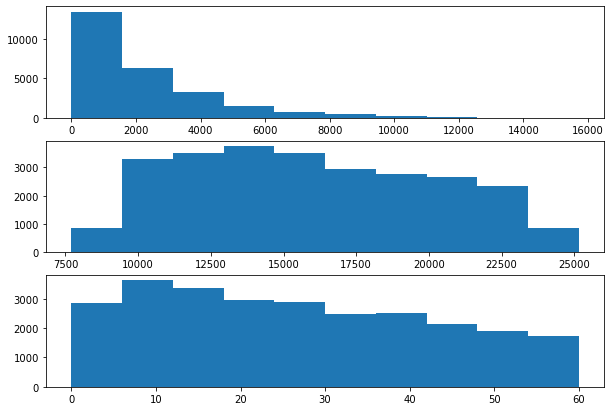

In [158]:
plt.figure(figsize=(10,7))

plt.subplot(311)
plt.hist(train_oh.DAYS_EMPLOYED)

plt.subplot(312)
plt.hist(train_oh.DAYS_BIRTH)

plt.subplot(313)
plt.hist(train_oh.begin_month)

plt.show()

고용일 변수는 확실히 이상치 처리를 해주고 더 적은 구간으로 나누면 유의미한 변환을 할 수 있을것 같습니다.

나머지 변수들은 구간화를 할지 그대로 연속형 변수로 나눌지 생각해봐야 할 것 같습니당